# Digit recognizer SVM

### Initial setup

In [20]:
# load necessary libraries
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [6]:
# load the data
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

### Taking a look at the data

In [17]:
# take a peek
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


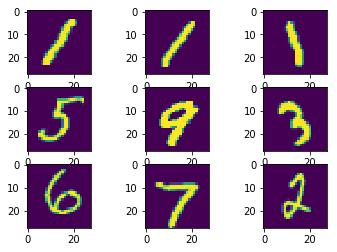

In [21]:
# plot a few digits.
# copied this code from https://www.kaggle.com/uysimty/digit-recognize-with-sklearn
def show_image(train_image, index):
    image_shaped = train_image.values.reshape(28,28)
    plt.subplot(3, 3, index+1)
    plt.imshow(image_shaped)

images_pixels = train_data.drop(columns=['label'])
sample_image = images_pixels.sample(9).reset_index(drop=True)
for index, image_pixels in sample_image.iterrows():
    show_image(image_pixels, index)